In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

In [3]:
customer_data = pd.read_csv("Mall_Customers.csv")

In [4]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer_data.shape

(200, 5)

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
customer_data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [10]:
customer_data['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [11]:
customer_data['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

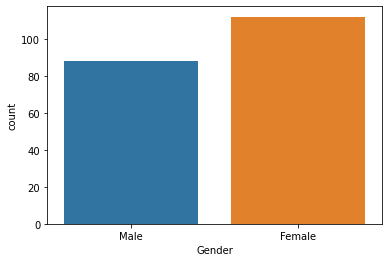

In [12]:
sns.countplot(x='Gender',data=customer_data)

<AxesSubplot:xlabel='Age', ylabel='Count'>

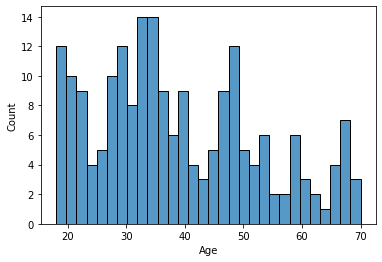

In [13]:
sns.histplot(customer_data['Age'],bins=30)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

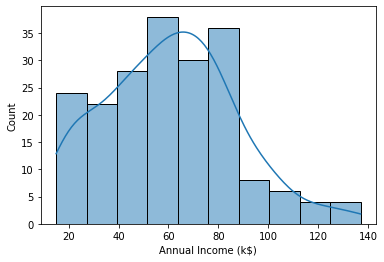

In [14]:
sns.histplot(customer_data['Annual Income (k$)'],kde=True)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

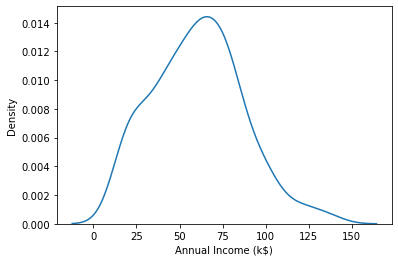

In [15]:
sns.kdeplot(customer_data['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)'>

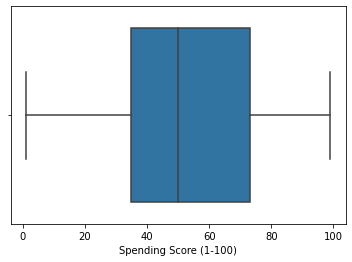

In [16]:
sns.boxplot(x='Spending Score (1-100)',data = customer_data)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

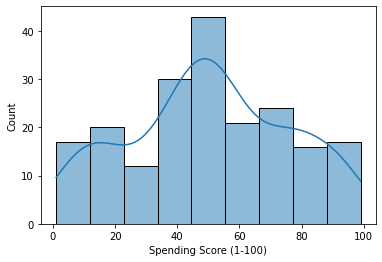

In [17]:
sns.histplot(customer_data['Spending Score (1-100)'],kde=True)

In [18]:
f1 = [customer_data['Age'],customer_data['Spending Score (1-100)'],customer_data['Annual Income (k$)']]

<AxesSubplot:>

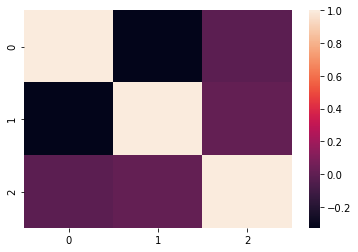

In [19]:
sns.heatmap(np.corrcoef(f1))

No good correlation between any two features

In [1]:
from sklearn.cluster import KMeans

## Annual Income Vs Spending Score

In [58]:
X1 = customer_data[['Annual Income (k$)','Spending Score (1-100)']].values
wcss = [] 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

C:\Users\Hp\Anaconda3\envs\Customer Segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'WCSS')

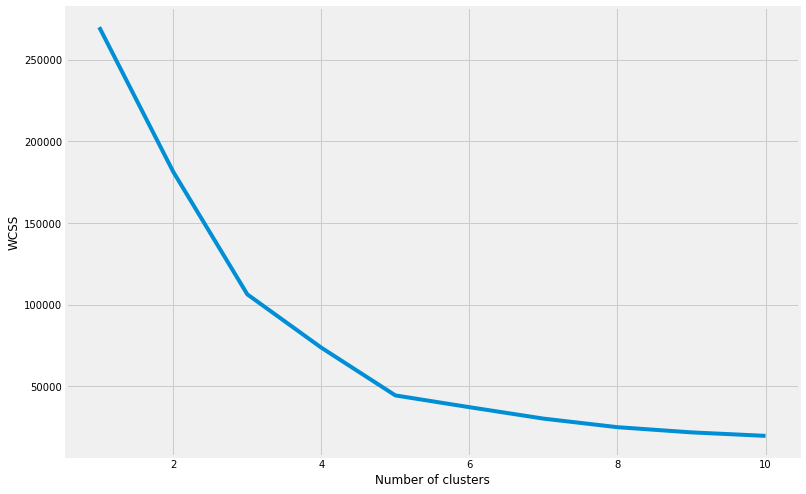

In [59]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

No of clusters = 5 

In [65]:
kmeans1 = KMeans(n_clusters=5, init='k-means++')
y_kmeans1 = kmeans1.fit_predict(X1)

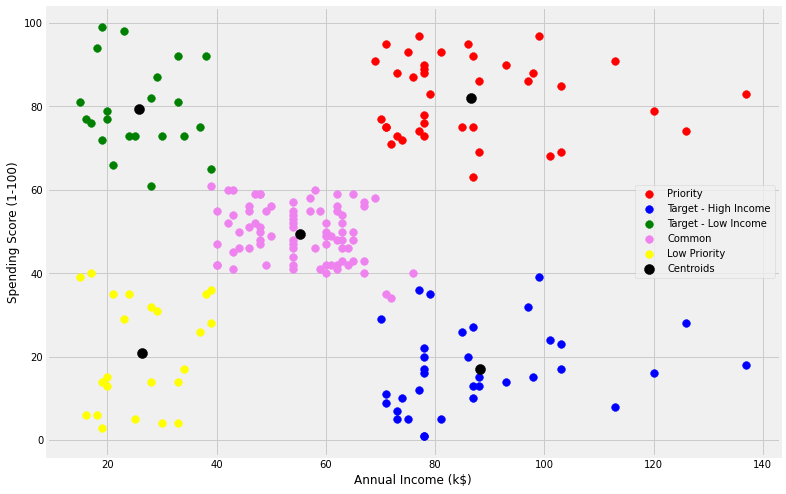

In [103]:
rcParams['figure.figsize'] = 11.7,8.27
plt.scatter(X1[y_kmeans1 == 0, 0], X1[y_kmeans1 == 0, 1], s = 60, c = 'red', label = 'Priority')
plt.scatter(X1[y_kmeans1 == 1, 0], X1[y_kmeans1 == 1, 1], s = 60, c = 'blue', label = 'Target - High Income')
plt.scatter(X1[y_kmeans1 == 2, 0], X1[y_kmeans1 == 2, 1], s = 60, c = 'green', label = 'Target - Low Income')
plt.scatter(X1[y_kmeans1 == 3, 0], X1[y_kmeans1 == 3, 1], s = 60, c = 'violet', label = 'Common')
plt.scatter(X1[y_kmeans1 == 4, 0], X1[y_kmeans1 == 4, 1], s = 60, c = 'yellow', label = 'Low Priority') 
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.legend() 

## Age Vs Spending Score

In [69]:
X2 = customer_data[['Age','Spending Score (1-100)']].values
wcss = [] 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

C:\Users\Hp\Anaconda3\envs\Customer Segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'WCSS')

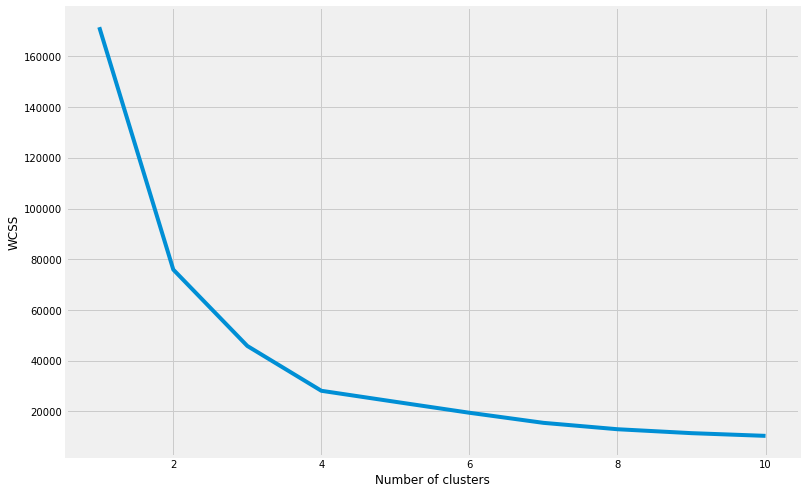

In [71]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

No of clusters = 4

In [72]:
kmeans2 = KMeans(n_clusters=4, init='k-means++')
y_kmeans2 = kmeans2.fit_predict(X2)

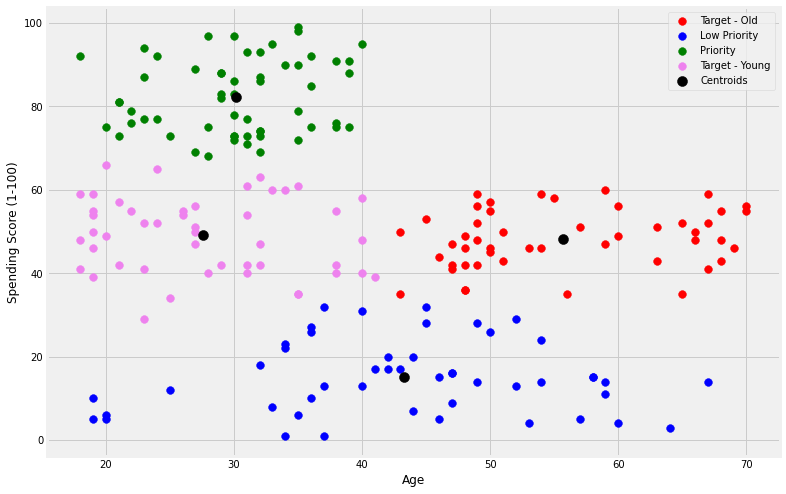

In [104]:
rcParams['figure.figsize'] = 11.7,8.27
plt.scatter(X2[y_kmeans2 == 0, 0], X2[y_kmeans2 == 0, 1], s = 60, c = 'red', label = 'Target - Old')
plt.scatter(X2[y_kmeans2 == 1, 0], X2[y_kmeans2 == 1, 1], s = 60, c = 'blue', label = 'Low Priority')
plt.scatter(X2[y_kmeans2 == 2, 0], X2[y_kmeans2 == 2, 1], s = 60, c = 'green', label = 'Priority')
plt.scatter(X2[y_kmeans2 == 3, 0], X2[y_kmeans2 == 3, 1], s = 60, c = 'violet', label = 'Target - Young')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Age') 
plt.ylabel('Spending Score (1-100)') 
plt.legend() 

## Age Vs Annual Income Vs Spending Score

In [90]:
X3 = customer_data[['Age','Annual Income (k$)','Spending Score (1-100)']].values
wcss = [] 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

C:\Users\Hp\Anaconda3\envs\Customer Segmentation\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'WCSS')

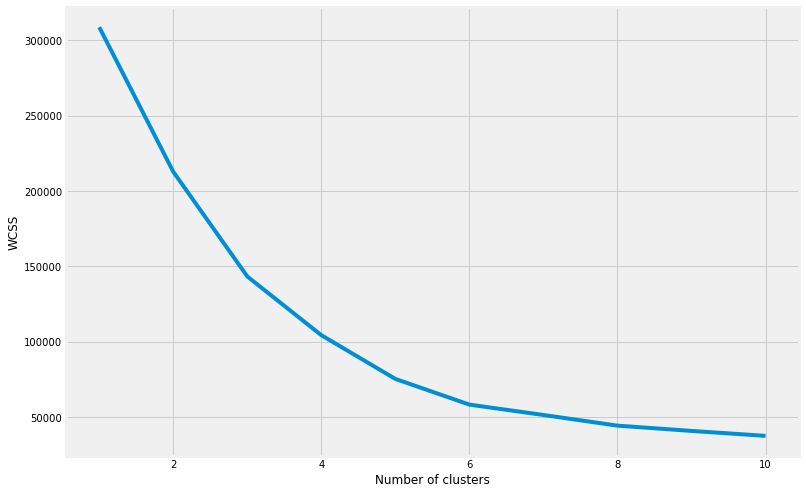

In [91]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

No of clusters = 5

In [100]:
kmeans3 = KMeans(n_clusters=5, init='k-means++')
y_kmeans3 = kmeans3.fit_predict(X3)

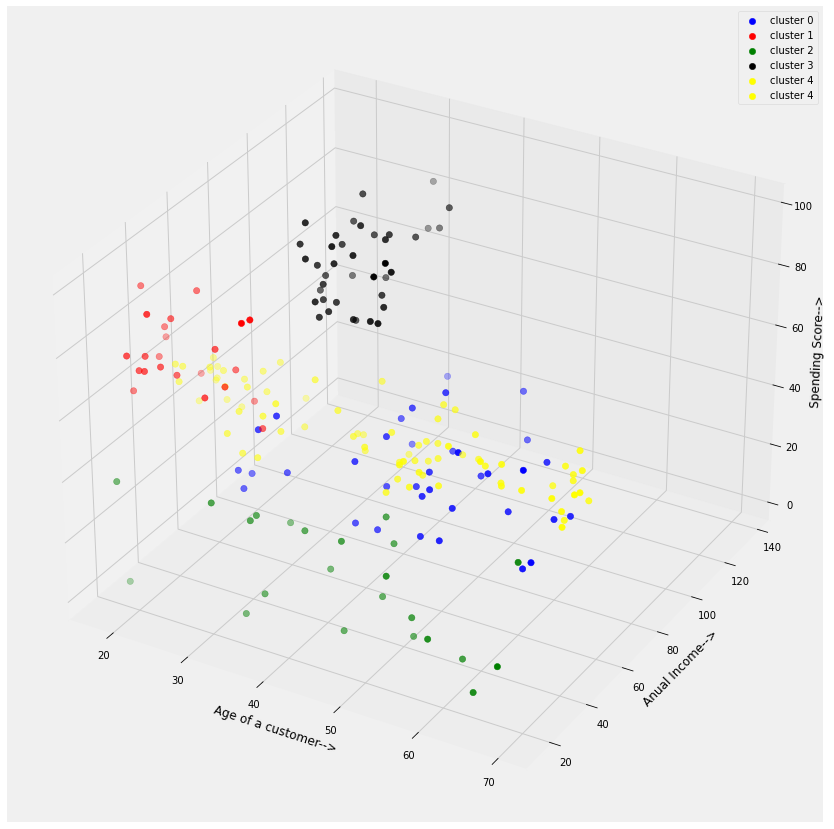

In [101]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[y_kmeans3 == 0,0],X3[y_kmeans3 == 0,1],X3[y_kmeans3 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X3[y_kmeans3 == 1,0],X3[y_kmeans3 == 1,1],X3[y_kmeans3 == 1,2], s = 40 , color = 'red', label = "cluster 1")
ax.scatter(X3[y_kmeans3 == 2,0],X3[y_kmeans3 == 2,1],X3[y_kmeans3 == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(X3[y_kmeans3 == 3,0],X3[y_kmeans3 == 3,1],X3[y_kmeans3 == 3,2], s = 40 , color = 'black', label = "cluster 3")
ax.scatter(X3[y_kmeans3 == 4,0],X3[y_kmeans3 == 4,1],X3[y_kmeans3 == 4,2], s = 40 , color = 'yellow', label = "cluster 4")
ax.scatter(X3[y_kmeans3 == 5,0],X3[y_kmeans3 == 5,1],X3[y_kmeans3 == 5,2], s = 40 , color = 'yellow', label = "cluster 4")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()

In [106]:
import pickle

In [107]:
pickle.dump(kmeans1, open("income-spend_seg.pkl","wb"))

In [108]:
pickle.dump(kmeans2, open("age-spend_seg.pkl","wb"))